In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df["TV"].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [9]:
df["Radio"].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [10]:
df["Newspaper"].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [11]:
df["Sales"].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

Text(0.5, 1.0, 'Scatter Plot of TV against Sales')

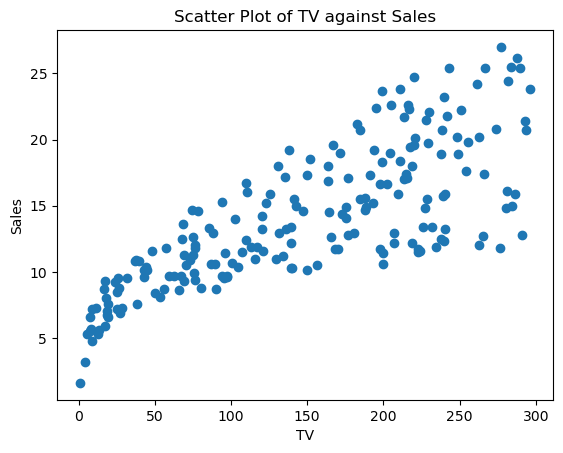

In [12]:
plt.scatter(df["TV"], df["Sales"])

plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Scatter Plot of TV against Sales")

Text(0.5, 1.0, 'Scatter Plot of Newspaper against Sales')

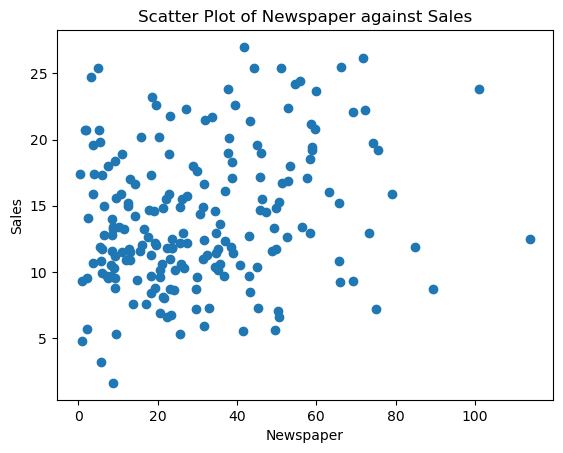

In [13]:
plt.scatter(df["Newspaper"], df["Sales"])

plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Scatter Plot of Newspaper against Sales")

Text(0.5, 1.0, 'Scatter Plot of Radio against Sales')

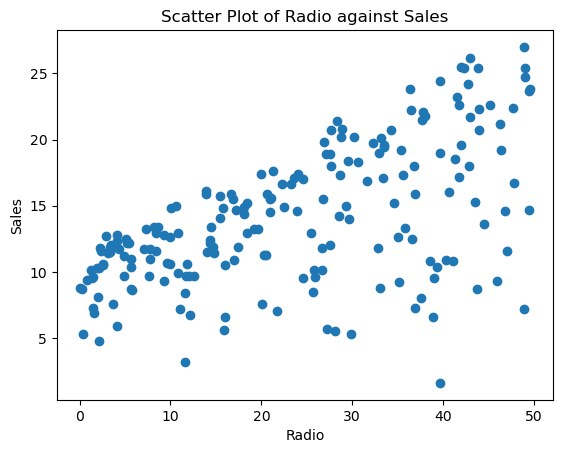

In [14]:
plt.scatter(df["Radio"], df["Sales"])

plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Scatter Plot of Radio against Sales")

In [15]:
scaler = MinMaxScaler()

In [16]:
X = df.drop("Sales", axis=1)
Y = df["Sales"]

In [17]:
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True ,random_state=101)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=101)

In [20]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [21]:
y_pred = model.predict(X_test)

In [22]:
model.score(X_test, y_test)

0.9807155665511872

In [23]:
dump(model, "model.joblib")

['model.joblib']